In [ ]:
cd drive/MyDrive/HAR/

/content/drive/MyDrive/HAR


In [ ]:
ls

 csv_files/        __MACOSX/                     t-sne_perp_5_iter_1000.png
 fig.html          t-sne_perp_10_iter_1000.png   UCI/
 HAR/              t-sne_perp_20_iter_1000.png  'UCI HAR Dataset'/
 HAR_Dataset.zip   t-sne_perp_2_iter_1000.png
 HAR.ipynb         t-sne_perp_50_iter_1000.png


In [ ]:
# !unzip './HAR_Dataset.zip'

In [ ]:
import numpy as np
import pandas as pd

# get the features from the file features.txt
features = list()
with open('./UCI HAR Dataset/features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
print('No of Features: {}'.format(len(features)))

No of Features: 561


In [ ]:
# get the data from txt files to pandas dataffame
X_train = pd.read_csv('./UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)
X_train.columns = [features]
# add subject column to the dataframe
X_train['subject'] = pd.read_csv('./UCI HAR Dataset/train/subject_train.txt', header=None, squeeze=True)

y_train = pd.read_csv('./UCI HAR Dataset/train/y_train.txt', names=['Activity'], squeeze=True)
y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})

# put all columns in a single dataframe
train = X_train
train['Activity'] = y_train
train['ActivityName'] = y_train_labels
train.sample(2)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
3576,0.39729,-0.029986,-0.097756,-0.111619,0.209082,-0.431945,-0.167483,0.181884,-0.425223,-0.008297,...,-0.785227,0.454294,-0.927253,0.698335,-0.571996,0.362678,0.148777,17,2,WALKING_UPSTAIRS
5407,0.28912,-0.004881,-0.096711,-0.568427,-0.125786,-0.486664,-0.589446,-0.159802,-0.495580,-0.495324,...,-0.140765,0.227345,0.853943,-0.747616,-0.856698,0.186052,-0.029934,25,1,WALKING


In [ ]:
train.shape

(7352, 564)

In [ ]:
# get the data from txt files to pandas dataffame
X_test = pd.read_csv('./UCI HAR Dataset/test/X_test.txt', delim_whitespace=True, header=None)
X_test.columns = [features]
# add subject column to the dataframe
X_test['subject'] = pd.read_csv('./UCI HAR Dataset/test/subject_test.txt', header=None, squeeze=True)

# get y labels from the txt file
y_test = pd.read_csv('./UCI HAR Dataset/test/y_test.txt', names=['Activity'], squeeze=True)
y_test_labels = y_test.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})


# put all columns in a single dataframe
test = X_test
test['Activity'] = y_test
test['ActivityName'] = y_test_labels
test.sample(2)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
187,0.278800,-0.015633,-0.106648,-0.995228,-0.986404,-0.983245,-0.996621,-0.986703,-0.984824,-0.933524,...,-0.280982,-0.340581,0.426251,0.091659,-0.666992,0.083944,-0.222873,2,4,SITTING
1206,0.276883,-0.012748,-0.094748,-0.993945,-0.977978,-0.975757,-0.995410,-0.977706,-0.975355,-0.940357,...,0.098337,0.301912,-0.323798,-0.520113,-0.855373,0.188267,0.063082,12,5,STANDING


In [ ]:
print('No of duplicates in train: {}'.format(sum(train.duplicated())))
print('No of duplicates in test : {}'.format(sum(test.duplicated())))

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)


No of duplicates in train: 0
No of duplicates in test : 0


In [ ]:
print('We have {} NaN/Null values in train'.format(train.isnull().values.sum()))
print('We have {} NaN/Null values in test'.format(test.isnull().values.sum()))

We have 0 NaN/Null values in train
We have 0 NaN/Null values in test


In [ ]:
mkdir ./csv_files

mkdir: cannot create directory ‘./csv_files’: File exists


In [ ]:
train.to_csv('./csv_files/train.csv', index=False)
test.to_csv('./csv_files/test.csv', index=False)

In [ ]:
train = pd.read_csv('./csv_files/train.csv')
test = pd.read_csv('./csv_files/test.csv')
print(train.shape, test.shape)

(7352, 564) (2947, 564)


In [ ]:
columns = train.columns

# Removing '()' from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

train.columns = columns
test.columns = columns

test.columns

<ipython-input-13-d44704abf7e4>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  columns = columns.str.replace('[()]','')
<ipython-input-13-d44704abf7e4>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  columns = columns.str.replace('[-]', '')
<ipython-input-13-d44704abf7e4>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  columns = columns.str.replace('[,]','')


Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'subject', 'Activity', 'ActivityName'],
      dtype='object', length=564)

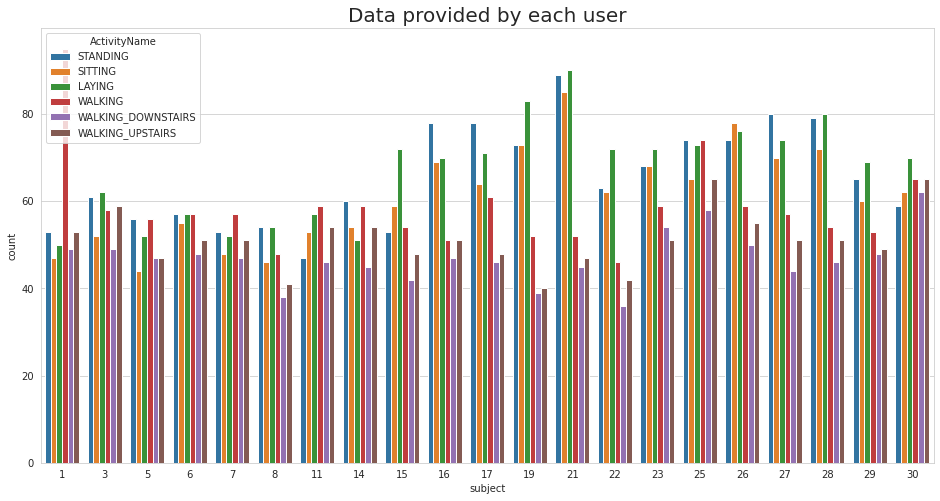

In [ ]:
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='ActivityName', data = train)
plt.show()

In [ ]:
import plotly
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


# Plotting data
label_counts = train['ActivityName'].value_counts()

# Get colors
n = label_counts.shape[0]
colormap = plt.get_cmap('viridis')
colors = [mlt.colors.to_hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]

# Create plot
data = go.Bar(x = label_counts.index,
              y = label_counts,
              marker = dict(color = colors))

layout = go.Layout(title = 'Smartphone ActivityName Distribution',
                   xaxis = dict(title = 'ActivityName'),
                   yaxis = dict(title = 'Count'))

fig = go.Figure(data=[data], layout=layout)
fig.show()
#iplot(fig)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3

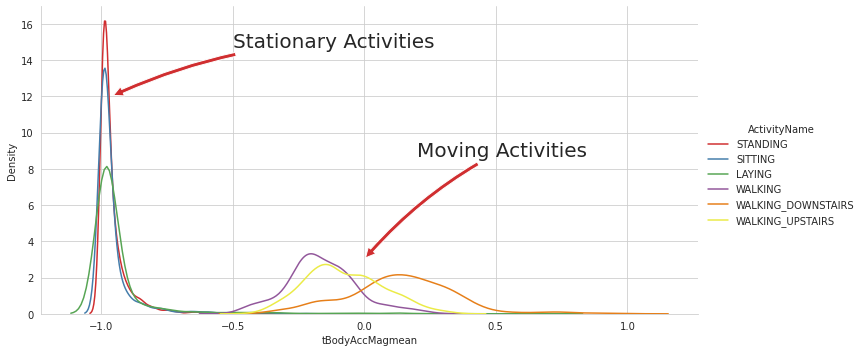

In [ ]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(train, hue='ActivityName', height=5,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMagmean', hist=False)\
    .add_legend()
plt.annotate("Stationary Activities", xy=(-0.960,12), xytext=(-0.5, 15), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3

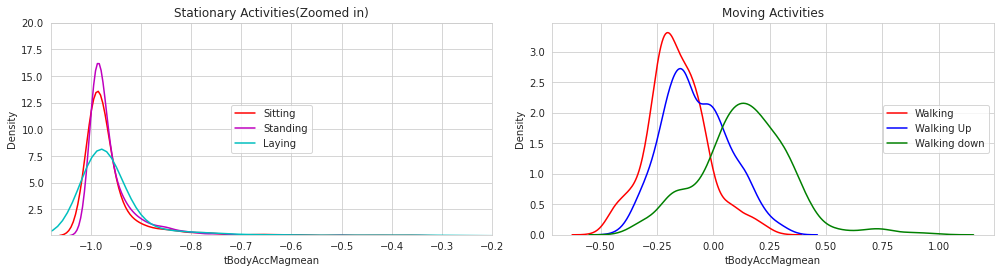

In [ ]:
# for plotting purposes taking datapoints of each activity to a different dataframe
df1 = train[train['Activity']==1]
df2 = train[train['Activity']==2]
df3 = train[train['Activity']==3]
df4 = train[train['Activity']==4]
df5 = train[train['Activity']==5]
df6 = train[train['Activity']==6]

plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
plt.title('Stationary Activities(Zoomed in)')
sns.distplot(df4['tBodyAccMagmean'],color = 'r',hist = False, label = 'Sitting')
sns.distplot(df5['tBodyAccMagmean'],color = 'm',hist = False,label = 'Standing')
sns.distplot(df6['tBodyAccMagmean'],color = 'c',hist = False, label = 'Laying')
plt.axis([-1.08, -0.2, 0.1, 20])
plt.legend(loc='center')

plt.subplot(2,2,2)
plt.title('Moving Activities')
sns.distplot(df1['tBodyAccMagmean'],color = 'red',hist = False, label = 'Walking')
sns.distplot(df2['tBodyAccMagmean'],color = 'blue',hist = False,label = 'Walking Up')
sns.distplot(df3['tBodyAccMagmean'],color = 'green',hist = False, label = 'Walking down')
plt.legend(loc='center right')


plt.tight_layout()
plt.show()


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3

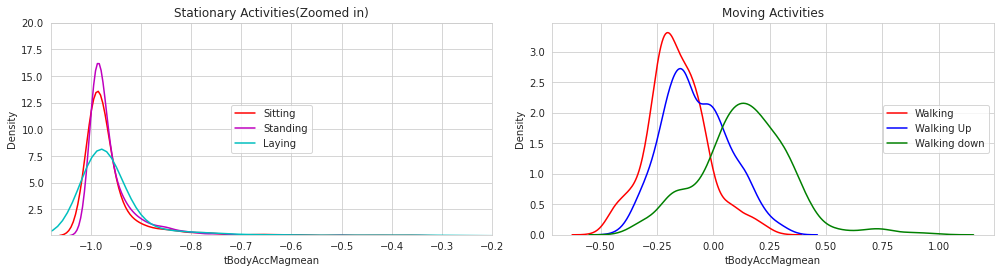

In [ ]:
# for plotting purposes taking datapoints of each activity to a different dataframe
df1 = train[train['Activity']==1]
df2 = train[train['Activity']==2]
df3 = train[train['Activity']==3]
df4 = train[train['Activity']==4]
df5 = train[train['Activity']==5]
df6 = train[train['Activity']==6]

plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
plt.title('Stationary Activities(Zoomed in)')
sns.distplot(df4['tBodyAccMagmean'],color = 'r',hist = False, label = 'Sitting')
sns.distplot(df5['tBodyAccMagmean'],color = 'm',hist = False,label = 'Standing')
sns.distplot(df6['tBodyAccMagmean'],color = 'c',hist = False, label = 'Laying')
plt.axis([-1.08, -0.2, 0.1, 20])
plt.legend(loc='center')

plt.subplot(2,2,2)
plt.title('Moving Activities')
sns.distplot(df1['tBodyAccMagmean'],color = 'red',hist = False, label = 'Walking')
sns.distplot(df2['tBodyAccMagmean'],color = 'blue',hist = False,label = 'Walking Up')
sns.distplot(df3['tBodyAccMagmean'],color = 'green',hist = False, label = 'Walking down')
plt.legend(loc='center right')


plt.tight_layout()
plt.show()


In [ ]:
# plt.figure(figsize=(20,20))
# # sns.set(rc={"axes.facecolor":"#283747", "axes.grid":False,'xtick.labelsize':10,'ytick.labelsize':10})
# sns.lineplot(data=df1['angleXgravityMean'],linewidth = 1 , label = 'Walking')
# sns.lineplot(data=df2['angleXgravityMean'],linewidth = 1 , label = 'Walking Up')
# sns.lineplot(data=df3['angleXgravityMean'],linewidth = 1 , label = 'Walking Down')
# sns.lineplot(data=df4['angleXgravityMean'],linewidth = 1 , label = 'Sitting')
# sns.lineplot(data=df5['angleXgravityMean'],linewidth = 1 , label = 'Standing')
# sns.lineplot(data=df6['angleXgravityMean'],linewidth = 2 , label = 'Laying')


# plt.show()

In [ ]:
# # plt.figure(figsize=(20,20))
# # sns.set(rc={"axes.facecolor":"#283747", "axes.grid":False,'xtick.labelsize':10,'ytick.labelsize':10})
# sns.lineplot(data=df1['angleXgravityMean'],linewidth = 1 , label = 'Walking')
# sns.lineplot(data=df2['angleXgravityMean'],linewidth = 1 , label = 'Walking Up')
# sns.lineplot(data=df3['angleXgravityMean'],linewidth = 1 , label = 'Walking Down')
# sns.lineplot(data=df4['angleXgravityMean'],linewidth = 1 , label = 'Sitting')
# sns.lineplot(data=df5['angleXgravityMean'],linewidth = 1 , label = 'Standing')
# sns.lineplot(data=df6['angleXgravityMean'],linewidth = 2 , label = 'Laying')


# plt.show()

In [ ]:
train.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING


In [ ]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# # fig = plt.figure()
# fig = plt.figure(figsize=(15,10))

# ax = plt.axes(projection='3d')
# z = np.linspace(-2, 2, 100)
# # ax = plt.axes(projection='3d')

# # Data for a three-dimensional line

# # zline = df1['tBodyAccmeanZ']
# # xline = df1['tBodyAccmeanX']
# # yline = df1['tBodyAccmeanY']
# ax.scatter3D(df1['tBodyAccmeanX'], df1['tBodyAccmeanY'], df1['tBodyAccmeanZ'], 'red',label='Walking')
# ax.scatter3D(df2['tBodyAccmeanX'], df2['tBodyAccmeanY'], df2['tBodyAccmeanZ'], 'red',label='Walking Up')
# ax.scatter3D(df3['tBodyAccmeanX'], df3['tBodyAccmeanY'], df3['tBodyAccmeanZ'], 'red',label='Walking Down')
# ax.scatter3D(df4['tBodyAccmeanX'], df4['tBodyAccmeanY'], df4['tBodyAccmeanZ'], 'red',label='Sitting')
# ax.scatter3D(df5['tBodyAccmeanX'], df5['tBodyAccmeanY'], df5['tBodyAccmeanZ'], 'red',label='Standing')
# ax.scatter3D(df6['tBodyAccmeanX'], df6['tBodyAccmeanY'], df6['tBodyAccmeanZ'], 'red',label='Laying')





In [ ]:
# import plotly.express as px
# fig = plt.figure(figsize=(15,10))

# fig = px.scatter_3d(df1, x=df1['tBodyAccmeanX'], y=df1['tBodyAccmeanY'], z=df1['tBodyAccmeanZ'],
#               color='subject')
# fig.show()

In [ ]:
import plotly.express as px
fig = plt.figure(figsize=(15,10))

fig = px.scatter_3d(train, x=train['tBodyAccmeanX'], y=train['tBodyAccmeanY'], z=train['tBodyAccmeanZ'],
              color='ActivityName')
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

fig.show()
fig.write_html("./fig.html")

<Figure size 1080x720 with 0 Axes>

In [ ]:
# plt.figure(figsize=(7,5))
# sns.boxplot(x='ActivityName', y='tBodyAccMagmean',data=train, showfliers=False, saturation=1)
# plt.ylabel('Acceleration Magnitude mean')
# plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
# plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
# plt.xticks(rotation=90)
# plt.show()


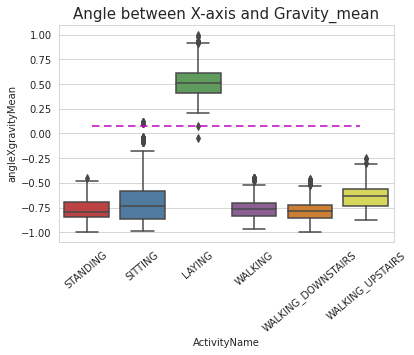

In [ ]:
sns.boxplot(x='ActivityName', y='angleXgravityMean', data=train)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.show()

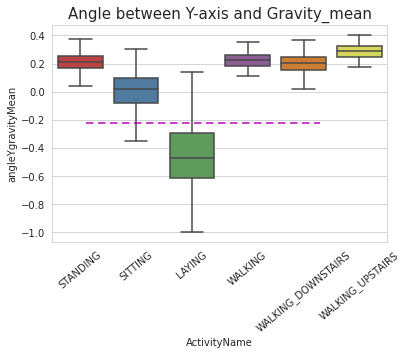

In [ ]:
sns.boxplot(x='ActivityName', y='angleYgravityMean', data = train, showfliers=False)
plt.title('Angle between Y-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=-0.22, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()


In [ ]:
# import plotly.graph_objects as go
# import numpy as np
# np.random.seed(1)

# N = 70

# fig = go.Figure(data=[go.Mesh3d(
#                    x=(train['tBodyAccmeanX']),
#                    y=(train['tBodyAccmeanY']),
#                    z=(train['tBodyAccmeanZ']),
#                    opacity=0.5,
#                    color='rgba(244,22,100,0.6)'
#                   )])

# # fig.update_layout(
# #     scene = dict(
# #         xaxis = dict(nticks=4, range=[-100,100],),
# #                      yaxis = dict(nticks=4, range=[-50,100],),
# #                      zaxis = dict(nticks=4, range=[-100,100],),),
# #     width=700,
# #     margin=dict(r=20, l=10, b=10, t=10))
# fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))


# fig.show()

In [ ]:
# fig = go.Figure(data=[go.Mesh3d(
#                    x=(train['angleXgravityMean']),
#                    y=(train['angleYgravityMean']),
#                    z=(train['angleZgravityMean']),
#                    opacity=0.5,
#                    color='rgba(244,22,100,0.6)'
#                   )])

# # fig.update_layout(
# #     scene = dict(
# #         xaxis = dict(nticks=4, range=[-100,100],),
# #                      yaxis = dict(nticks=4, range=[-50,100],),
# #                      zaxis = dict(nticks=4, range=[-100,100],),),
# #     width=700,
# #     margin=dict(r=20, l=10, b=10, t=10))
# fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))


# fig.show()

In [ ]:
train.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING


In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# performs t-sne with different perplexity values and their repective plots..

def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('Done..')
        
        # prepare the data for seaborn         
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, height=8,\
                   palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')


performing tsne with perplexity 2 and with 1000 iterations at max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.002s...


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computed neighbors for 7352 samples in 1.295s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.597443
[t-SNE] Computed conditional probabilities in 0.041s
[t-SNE] Iteration 50: error = 124.6968765, gradient norm = 0.0297489 (50 iterations in 3.415s)
[t-SNE] Iteration 100: error = 107.1873627, gradient norm = 0.0284481 (50 iterations in 2.595s)
[t-SNE] Iteration 150: error = 100.7733765, gradient norm = 0.0223367 (50 iterations in 1.649s)
[t-SNE] Iteration 200: error = 97.3102341, gra

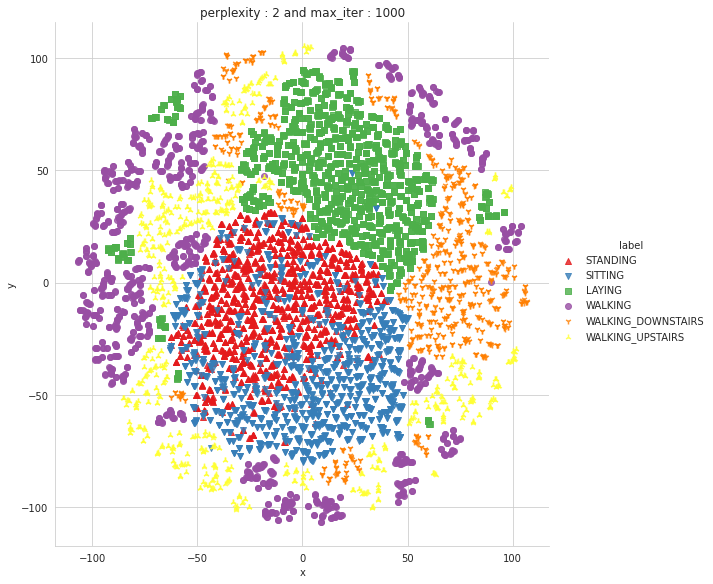

Done

performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.003s...


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computed neighbors for 7352 samples in 1.332s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961446
[t-SNE] Computed conditional probabilities in 0.052s
[t-SNE] Iteration 50: error = 114.1440353, gradient norm = 0.0185066 (50 iterations in 3.092s)
[t-SNE] Iteration 100: error = 97.6375732, gradient norm = 0.0188657 (50 iterations in 2.135s)
[t-SNE] Iteration 150: error = 93.1499023, gradient norm = 0.0101574 (50 iterations in 1.776s)
[t-SNE] Iteration 200: error = 91.1372986, gradi

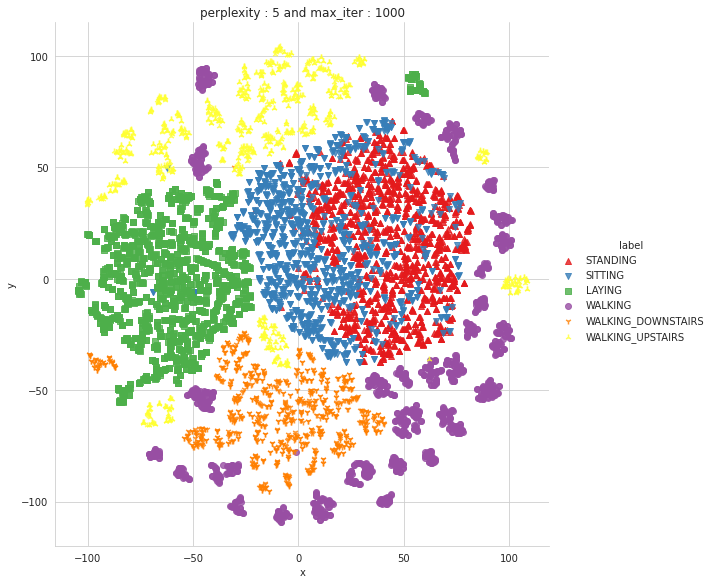

Done

performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.003s...


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computed neighbors for 7352 samples in 1.200s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133827
[t-SNE] Computed conditional probabilities in 0.095s
[t-SNE] Iteration 50: error = 105.3904037, gradient norm = 0.0251615 (50 iterations in 3.199s)
[t-SNE] Iteration 100: error = 90.1764679, gradient norm = 0.0107347 (50 iterations in 2.074s)
[t-SNE] Iteration 150: error = 87.1836090, gradient norm = 0.0060026 (50 iterations in 1.873s)
[t-SNE] Iteration 200: error = 85.9561768, gradi

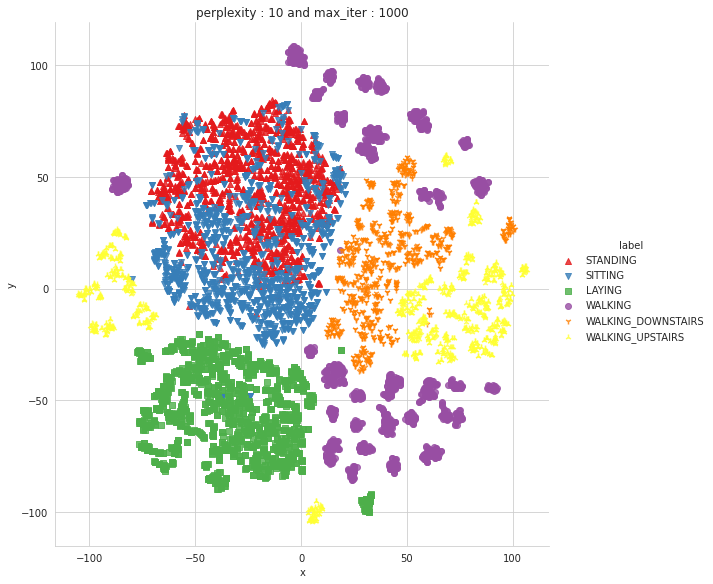

Done

performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.005s...


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computed neighbors for 7352 samples in 1.463s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274336
[t-SNE] Computed conditional probabilities in 0.180s
[t-SNE] Iteration 50: error = 98.1780624, gradient norm = 0.0096397 (50 iterations in 3.019s)
[t-SNE] Iteration 100: error = 84.1322937, gradient norm = 0.0065448 (50 iterations in 2.688s)
[t-SNE] Iteration 150: error = 81.9981384, gradient norm = 0.0039530 (50 iterations in 2.632s)
[t-SNE] Iteration 200: error = 81.2441559, gradie

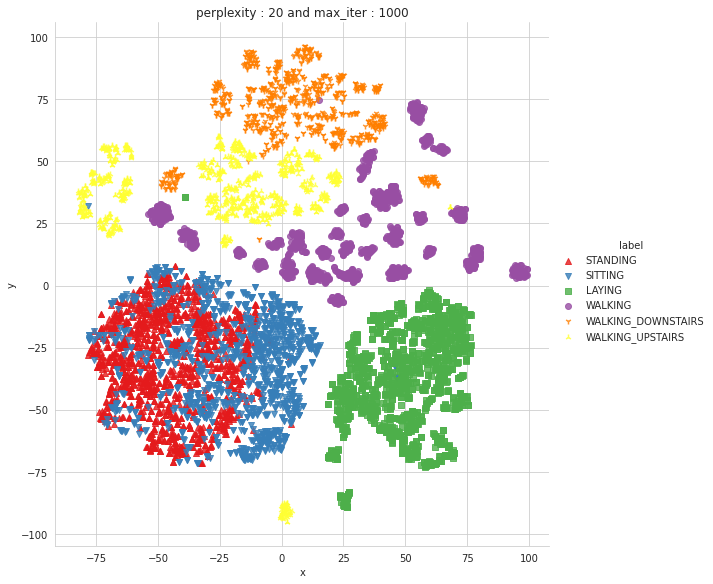

Done

performing tsne with perplexity 50 and with 1000 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.004s...


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computed neighbors for 7352 samples in 1.289s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] Computed conditional probabilities in 0.446s
[t-SNE] Iteration 50: error = 85.7496796, gradient norm = 0.0282820 (50 iterations in 4.383s)
[t-SNE] Iteration 100: error = 75.9446182, gradient norm = 0.0044262 (50 iterations in 4.730s)
[t-SNE] Iteration 150: error = 74.9114685, gradient norm = 0.0028817 (50 iterations in 3.546s)
[t-SNE] Iteration 200: error = 74.4740295, gradie

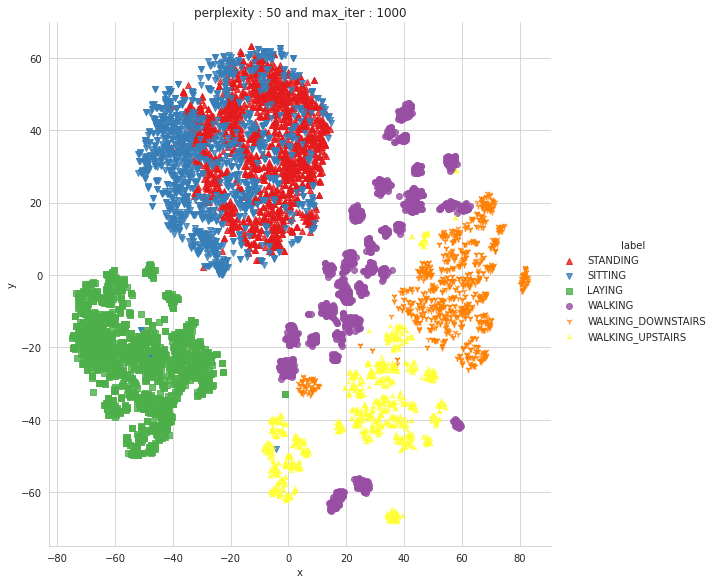

Done


In [ ]:
X_pre_tsne = train.drop(['subject', 'Activity','ActivityName'], axis=1)
y_pre_tsne = train['ActivityName']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[2,5,10,20,50])

In [ ]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from datetime import datetime

from sklearn import linear_model
from sklearn import metrics

from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


     


In [ ]:
train = pd.read_csv('./csv_files/train.csv')
test = pd.read_csv('./csv_files/test.csv')
print(train.shape, test.shape)



(7352, 564) (2947, 564)


In [ ]:
train.head(2)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING


In [ ]:
X_train = train.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_train = train.ActivityName

X_test = test.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_test = test.ActivityName

print('X_train and y_train : ({},{})'.format(X_train.shape, y_train.shape))
print('X_test  and y_test  : ({},{})'.format(X_test.shape, y_test.shape))



X_train and y_train : ((7352, 561),(7352,))
X_test  and y_test  : ((2947, 561),(2947,))


In [ ]:
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']


In [ ]:
plt.rcParams["font.family"] = 'DejaVu Sans'

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



In [ ]:
from datetime import datetime
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Greens):
    
    
    # to store results at various phases
    results = dict()
    
    # time at which model starts training 
    train_start_time = datetime.now()
    print('training the model..')
    model.fit(X_train, y_train)
    print('Done....!\n')
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('==> training time:- {}\n'.format(results['training_time']))
    
    
    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done....!\n')
    results['testing_time'] = test_end_time - test_start_time
    print('==> testing time:- {}\n'.format(results['testing_time']))
    results['predicted'] = y_pred
   

    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('==> Accuracy:- {}\n'.format(accuracy))
   
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('\n ********Confusion Matrix********')
        print('\n {}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(6,6))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    plt.show()
    
    # get classification report
    print('****************| Classifiction Report |****************')
    classification_report = metrics.classification_report(y_test, y_pred)
   
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    # add the trained  model to the results
    results['model'] = model
    
    return results

In [ ]:
def print_grid_search_attributes(model):
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('\n\n==> Best Estimator:')
    print('\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('\n==> Best parameters:')
    print('\tParameters of best estimator : {}'.format(model.best_params_))


    #  number of cross validation splits
    print('\n==> No. of CrossValidation sets:')
    print('\tTotal numbre of cross validation sets: {}'.format(model.n_splits_))


    # Average cross validated score of the best estimator, from the Grid Search 
    print('\n==> Best Score:')
    print('\tAverage Cross Validate scores of best estimator : {}'.format(model.best_score_))

    



training the model..
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Done....!

==> training time:- 0:00:20.141504

Predicting test data
Done....!

==> testing time:- 0:00:00.014056

==> Accuracy:- 0.9582626399728538


 ********Confusion Matrix********

 [[537   0   0   0   0   0]
 [  0 429  59   0   0   3]
 [  0  16 516   0   0   0]
 [  0   0   0 492   3   1]
 [  0   0   0   4 403  13]
 [  0   0   0  23   1 447]]


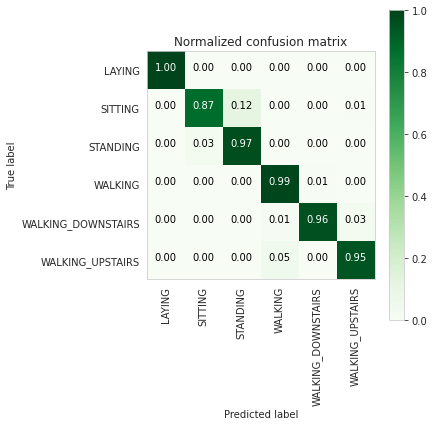

****************| Classifiction Report |****************
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.96      0.87      0.92       491
          STANDING       0.90      0.97      0.93       532
           WALKING       0.95      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.96      0.97       420
  WALKING_UPSTAIRS       0.96      0.95      0.96       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



==> Best Estimator:
	LogisticRegression(C=1)


==> Best parameters:
	Parameters of best estimator : {'C': 1, 'penalty': 'l2'}

==> No. of CrossValidation sets:
	Total numbre of cross validation sets: 3

==> Best Score:
	Average Cross Validate scores of best estimator : 0.9371615639319785


In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=ConvergenceWarning)

# start Grid search
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# observe the attributes of the model 
print_grid_search_attributes(log_reg_grid_results['model'])


training the model..
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Done....!

==> training time:- 0:01:17.988557

Predicting test data
Done....!

==> testing time:- 0:00:00.017003

==> Accuracy:- 0.9670851713607058


 ********Confusion Matrix********

 [[537   0   0   0   0   0]
 [  2 429  57   0   0   3]
 [  0   9 522   1   0   0]
 [  0   0   0 496   0   0]
 [  0   0   0   3 412   5]
 [  0   0   0  17   0 454]]


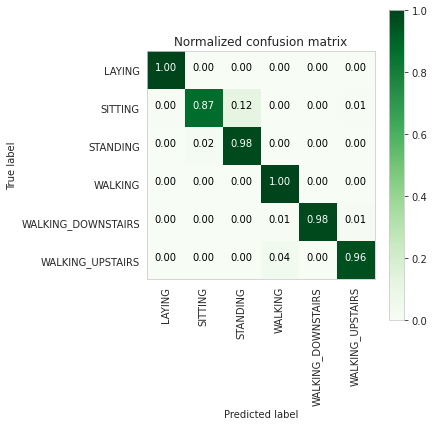

****************| Classifiction Report |****************
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.98      0.87      0.92       491
          STANDING       0.90      0.98      0.94       532
           WALKING       0.96      1.00      0.98       496
WALKING_DOWNSTAIRS       1.00      0.98      0.99       420
  WALKING_UPSTAIRS       0.98      0.96      0.97       471

          accuracy                           0.97      2947
         macro avg       0.97      0.97      0.97      2947
      weighted avg       0.97      0.97      0.97      2947



==> Best Estimator:
	LinearSVC(C=0.5, tol=5e-05)


==> Best parameters:
	Parameters of best estimator : {'C': 0.5}

==> No. of CrossValidation sets:
	Total numbre of cross validation sets: 5

==> Best Score:
	Average Cross Validate scores of best estimator : 0.9423365104029375


In [ ]:
parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
lr_svc = LinearSVC(tol=0.00005)
lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, n_jobs=-1, verbose=1)
lr_svc_grid_results = perform_model(lr_svc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# observe the attributes of the model 
print_grid_search_attributes(lr_svc_grid_results['model'])



training the model..
Done....!

==> training time:- 0:06:24.429567

Predicting test data
Done....!

==> testing time:- 0:00:01.482795

==> Accuracy:- 0.9626739056667798


 ********Confusion Matrix********

 [[537   0   0   0   0   0]
 [  0 441  48   0   0   2]
 [  0  12 520   0   0   0]
 [  0   0   0 489   2   5]
 [  0   0   0   4 397  19]
 [  0   0   0  17   1 453]]


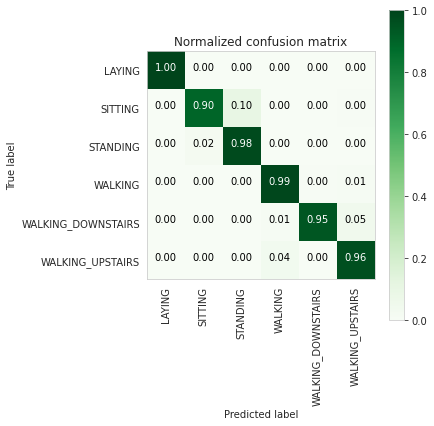

****************| Classifiction Report |****************
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.90      0.93       491
          STANDING       0.92      0.98      0.95       532
           WALKING       0.96      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.95      0.97       420
  WALKING_UPSTAIRS       0.95      0.96      0.95       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



==> Best Estimator:
	SVC(C=16, gamma=0.0078125)


==> Best parameters:
	Parameters of best estimator : {'C': 16, 'gamma': 0.0078125}

==> No. of CrossValidation sets:
	Total numbre of cross validation sets: 5

==> Best Score:
	Average Cross Validate scores of best estimator : 0.9447834551903698


In [ ]:
parameters = {'C':[2,8,16],\
              'gamma': [ 0.0078125, 0.125, 2]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=-1)
rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# observe the attributes of the model 
print_grid_search_attributes(rbf_svm_grid_results['model'])


training the model..
Done....!

==> training time:- 0:00:26.212507

Predicting test data
Done....!

==> testing time:- 0:00:00.009108

==> Accuracy:- 0.8754665761791652


 ********Confusion Matrix********

 [[537   0   0   0   0   0]
 [  0 369 122   0   0   0]
 [  0  59 473   0   0   0]
 [  0   0   0 474  17   5]
 [  0   0   0  19 352  49]
 [  0   0   0  65  31 375]]


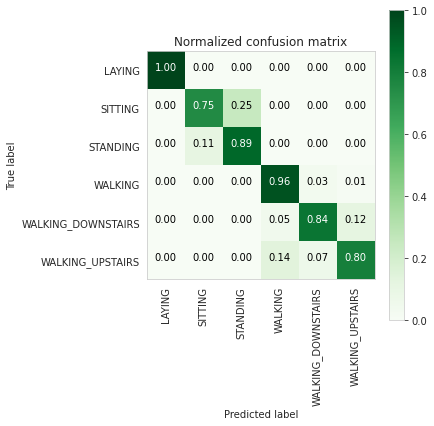

****************| Classifiction Report |****************
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.86      0.75      0.80       491
          STANDING       0.79      0.89      0.84       532
           WALKING       0.85      0.96      0.90       496
WALKING_DOWNSTAIRS       0.88      0.84      0.86       420
  WALKING_UPSTAIRS       0.87      0.80      0.83       471

          accuracy                           0.88      2947
         macro avg       0.88      0.87      0.87      2947
      weighted avg       0.88      0.88      0.87      2947



==> Best Estimator:
	DecisionTreeClassifier(max_depth=9)


==> Best parameters:
	Parameters of best estimator : {'max_depth': 9}

==> No. of CrossValidation sets:
	Total numbre of cross validation sets: 5

==> Best Score:
	Average Cross Validate scores of best estimator : 0.848893575105093


In [ ]:
parameters = {'max_depth':np.arange(3,10,2)}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt,param_grid=parameters, n_jobs=-1)
dt_grid_results = perform_model(dt_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# observe the attributes of the model 
print_grid_search_attributes(dt_grid_results['model'])


training the model..
Done....!

==> training time:- 0:19:43.840783

Predicting test data
Done....!

==> testing time:- 0:00:00.056202

==> Accuracy:- 0.9284017645062775


 ********Confusion Matrix********

 [[537   0   0   0   0   0]
 [  0 443  48   0   0   0]
 [  0  41 491   0   0   0]
 [  0   0   0 483   5   8]
 [  0   0   0  27 352  41]
 [  0   0   0  35   6 430]]


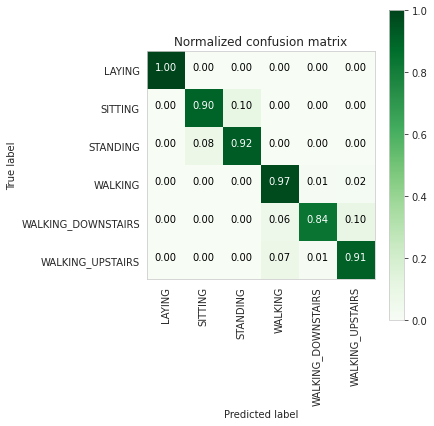

****************| Classifiction Report |****************
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.92      0.90      0.91       491
          STANDING       0.91      0.92      0.92       532
           WALKING       0.89      0.97      0.93       496
WALKING_DOWNSTAIRS       0.97      0.84      0.90       420
  WALKING_UPSTAIRS       0.90      0.91      0.91       471

          accuracy                           0.93      2947
         macro avg       0.93      0.93      0.93      2947
      weighted avg       0.93      0.93      0.93      2947



==> Best Estimator:
	RandomForestClassifier(max_depth=13, n_estimators=90)


==> Best parameters:
	Parameters of best estimator : {'max_depth': 13, 'n_estimators': 90}

==> No. of CrossValidation sets:
	Total numbre of cross validation sets: 5

==> Best Score:
	Average Cross Validate scores of best estimator : 0.9212508497620666


In [ ]:
params = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=params, n_jobs=-1)
rfc_grid_results = perform_model(rfc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# observe the attributes of the model 
print_grid_search_attributes(rfc_grid_results['model'])


In [ ]:
# param_grid = {'max_depth': np.arange(5),'n_estimators':np.arange(140)}
# gbdt = GradientBoostingClassifier()
# gbdt_grid = GridSearchCV(gbdt, param_grid=param_grid, n_jobs=-1)
# gbdt_grid_results = perform_model(gbdt_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# # observe the attributes of the model 
# print_grid_search_attributes(gbdt_grid_results['model'])


     

training the model..


KeyboardInterrupt: ignored

In [ ]:

# ***************************** Print Accuracy and Error ******************************

print('\n                     Accuracy     Error')
print('                     ----------   --------')
print('Logistic Regression : {:.04}%       {:.04}%'.format(log_reg_grid_results['accuracy'] * 100,\
                                                  100-(log_reg_grid_results['accuracy'] * 100)))

print('Linear SVC          : {:.04}%       {:.04}% '.format(lr_svc_grid_results['accuracy'] * 100,\
                                                        100-(lr_svc_grid_results['accuracy'] * 100)))

print('rbf SVM classifier  : {:.04}%      {:.04}% '.format(rbf_svm_grid_results['accuracy'] * 100,\
                                                          100-(rbf_svm_grid_results['accuracy'] * 100)))

print('DecisionTree        : {:.04}%      {:.04}% '.format(dt_grid_results['accuracy'] * 100,\
                                                        100-(dt_grid_results['accuracy'] * 100)))

print('Random Forest       : {:.04}%      {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                           100-(rfc_grid_results['accuracy'] * 100)))



                     Accuracy     Error
                     ----------   --------
Logistic Regression : 95.83%       4.174%
Linear SVC          : 96.71%       3.291% 
rbf SVM classifier  : 96.27%      3.733% 
DecisionTree        : 87.55%      12.45% 
Random Forest       : 92.84%      7.16% 


In [ ]:
import plotly.express as px
import pandas as pd

df = pd.DataFrame(dict(
    Models = ['Logistic Regression', 'Linear SVC', 'rbf SVM classifier', 'Decision Tree', 'Random Forest'],
    Accuracy_Percentage = [95.71, 96.71, 96.27, 87.55, 92.84]
))

# df = px.data.gapminder().query("country=='Canada'")
fig = px.line(df, x="Models", y="Accuracy_Percentage", title='Accuracy of models')
fig.show()


In [ ]:
import plotly.graph_objects as go

# df = pd.DataFrame(dict(
#     Models = ['Logistic Regression', 'Linear SVC', 'rbf SVM classifier', 'Decision Tree', 'Random Forest'],
#     Error_Percentage = [4.174, 3.291, 3.733,  12.45,7.16]
# ))
Models = ['Logistic Regression', 'Linear SVC', 'rbf SVM classifier', 'Decision Tree', 'Random Forest']
Error_Percentage = [4.174, 3.291, 3.733,  12.45,7.16]


# df = px.data.gapminder().query("country=='Canada'")
# fig = px.line(df, x="Models", y="Error_Percentage", title='Error')
# fig.add_trace(go.Scatter(x="Models", y="Error_Percentage",
#                     mode='lines+markers',
#                     name='lines+markers'))

fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=Models, y=Error_Percentage, name='Error',
                         line=dict(color='firebrick', width=4)))

fig.show()


In [ ]:
Importing Libraries

import pandas as pd
import numpy as np

# Import Keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout
from keras.layers import BatchNormalization
from keras.regularizers import L1L2


     

In [ ]:
# Activities are the class labels
# It is a 6 class classification
ACTIVITIES = {
    0: 'WALKING',
    1: 'WALKING_UPSTAIRS',
    2: 'WALKING_DOWNSTAIRS',
    3: 'SITTING',
    4: 'STANDING',
    5: 'LAYING',
}

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# function to print the confusion matrix

def confusion_matrix(Y_true, Y_pred):
    
    Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_true, axis=1)])
    Y_pred = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_pred, axis=1)])

    return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])

    
   # result = confusion_matrix(Y_true, Y_pred)

    #plt.figure(figsize=(10, 8))
   # sns.heatmap(result, 
    #            xticklabels= list(ACTIVITIES.values()), 
     #           yticklabels=list(ACTIVITIES.values()), 
      #          annot=True, fmt="d");
   # plt.title("Confusion matrix")
   # plt.ylabel('True label')
   # plt.xlabel('Predicted label')
    plt.show()  



In [ ]:
# Data directory
DATADIR = 'UCI HAR Dataset'

# Raw data signals
# Signals are from Accelerometer and Gyroscope
# The signals are in x,y,z directions
# Sensor signals are filtered to have only body acceleration
# excluding the acceleration due to gravity
# Triaxial acceleration from the accelerometer is total acceleration
SIGNALS = [
    "body_acc_x",
    "body_acc_y",
    "body_acc_z",
    "body_gyro_x",
    "body_gyro_y",
    "body_gyro_z",
    "total_acc_x",
    "total_acc_y",
    "total_acc_z"
    ]


In [ ]:
# function to read the data from csv file
def _read_csv(filename):
    return pd.read_csv(filename, delim_whitespace=True, header=None)

# function to load the load
def load_signals(subset):
    signals_data = []

    for signal in SIGNALS:
        filename = f'UCI HAR Dataset/{subset}/Inertial Signals/{signal}_{subset}.txt'
        signals_data.append(
            _read_csv(filename).to_numpy()
        ) 

    # Transpose is used to change the dimensionality of the output,
    # aggregating the signals by combination of sample/timestep.
    # Resultant shape is (7352 train/2947 test samples, 128 timesteps, 9 signals)
    return np.transpose(signals_data, (1, 2, 0))



In [ ]:
def load_y(subset):
    """
    The objective that we are trying to predict is a integer, from 1 to 6,
    that represents a human activity. We return a binary representation of 
    every sample objective as a 6 bits vector using One Hot Encoding
    (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
    """
    filename = f'UCI HAR Dataset/{subset}/y_{subset}.txt'
    y = _read_csv(filename)[0]

    return pd.get_dummies(y).to_numpy()


In [ ]:
def load_data():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    X_train, X_test = load_signals('train'), load_signals('test')
    y_train, y_test = load_y('train'), load_y('test')

    return X_train, X_test, y_train, y_test


In [ ]:
# Importing tensorflow
np.random.seed(42)
import tensorflow as tf
tf.random.set_seed(42)


In [ ]:
# Initializing parameters
epochs = 30
batch_size = 16
n_hidden = 32


In [ ]:
#function to count the number of classes
def _count_classes(y):
    return len(set([tuple(category) for category in y]))


In [ ]:
# Loading the train and test data
X_train, X_test, Y_train, Y_test = load_data()


In [ ]:
timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = _count_classes(Y_train)

print(timesteps)
print(input_dim)
print(len(X_train))


128
9
7352


In [ ]:
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(n_hidden, input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model.add(Dropout(0.5))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                5376      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 6)                 198       
                                                                 
Total params: 5,574
Trainable params: 5,574
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


In [ ]:
# Training the model
model.fit(X_train, Y_train, batch_size=batch_size, validation_data=(X_test, Y_test),epochs=epochs)


Epoch 1/30
460/460 [==============================] - 11s 10ms/step - loss: 1.1753 - accuracy: 0.5068 - val_loss: 0.8943 - val_accuracy: 0.6240
Epoch 2/30
460/460 [==============================] - 4s 8ms/step - loss: 0.7942 - accuracy: 0.6503 - val_loss: 0.8490 - val_accuracy: 0.6590
Epoch 3/30
460/460 [==============================] - 5s 10ms/step - loss: 0.6732 - accuracy: 0.7160 - val_loss: 0.7309 - val_accuracy: 0.7255
Epoch 4/30
460/460 [==============================] - 4s 9ms/step - loss: 0.5171 - accuracy: 0.8158 - val_loss: 0.6020 - val_accuracy: 0.7917
Epoch 5/30
460/460 [==============================] - 4s 9ms/step - loss: 0.3822 - accuracy: 0.8823 - val_loss: 0.4634 - val_accuracy: 0.8544
Epoch 6/30
460/460 [==============================] - 5s 10ms/step - loss: 0.3026 - accuracy: 0.9100 - val_loss: 0.3910 - val_accuracy: 0.8731
Epoch 7/30
460/460 [==============================] - 4s 9ms/step - loss: 0.2676 - accuracy: 0.9181 - val_loss: 0.4763 - val_accuracy: 0.8571
Ep

In [ ]:
# Confusion Matrix
confusion_matrix(Y_test, model.predict(X_test))



93/93 [==============================] - 1s 7ms/step


Pred,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
True,,,,,,
LAYING,510,0,0,0,0,27
SITTING,0,394,44,51,0,2
STANDING,0,113,28,389,1,1
WALKING,0,0,0,435,32,29
WALKING_DOWNSTAIRS,0,0,0,0,414,6
WALKING_UPSTAIRS,0,0,0,1,26,444


In [ ]:
score = model.evaluate(X_test, Y_test)

print("\n   cat_crossentropy  ||   accuracy ")
print("  ____________________________________")
print(score)


     

93/93 [==============================] - 1s 5ms/step - loss: 0.8749 - accuracy: 0.7550

   cat_crossentropy  ||   accuracy 
  ____________________________________
[0.8749200701713562, 0.7550050616264343]


In [ ]:
# Initializing parameters
n_epochs = 30
n_batch = 16
n_classes = _count_classes(Y_train)

# Bias regularizer value - we will use elasticnet
reg = L1L2(0.01, 0.01)



In [ ]:
# Model execution
model = Sequential()
model.add(LSTM(48, input_shape=(timesteps, input_dim), return_sequences=True,bias_regularizer=reg ))
model.add(BatchNormalization())
model.add(Dropout(0.50))
model.add(LSTM(32))
model.add(Dropout(0.50))
model.add(Dense(n_classes, activation='sigmoid'))
print("Model Summary: ")
model.summary()


Model Summary: 
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128, 48)           11136     
                                                                 
 batch_normalization (BatchN  (None, 128, 48)          192       
 ormalization)                                                   
                                                                 
 dropout_1 (Dropout)         (None, 128, 48)           0         
                                                                 
 lstm_2 (LSTM)               (None, 32)                10368     
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 6)                 198       
                                      

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
# Training the model
model.fit(X_train, Y_train, batch_size=n_batch, validation_data=(X_test, Y_test), epochs=n_epochs)



Epoch 1/30
460/460 [==============================] - 11s 17ms/step - loss: 1.5782 - accuracy: 0.6666 - val_loss: 1.1719 - val_accuracy: 0.7838
Epoch 2/30
460/460 [==============================] - 7s 15ms/step - loss: 0.7550 - accuracy: 0.8629 - val_loss: 0.5161 - val_accuracy: 0.8904
Epoch 3/30
460/460 [==============================] - 7s 15ms/step - loss: 0.4275 - accuracy: 0.9066 - val_loss: 0.3250 - val_accuracy: 0.9013
Epoch 4/30
460/460 [==============================] - 7s 15ms/step - loss: 0.2421 - accuracy: 0.9313 - val_loss: 0.4269 - val_accuracy: 0.8789
Epoch 5/30
460/460 [==============================] - 7s 15ms/step - loss: 0.2511 - accuracy: 0.9170 - val_loss: 0.2255 - val_accuracy: 0.9128
Epoch 6/30
460/460 [==============================] - 7s 16ms/step - loss: 0.2032 - accuracy: 0.9297 - val_loss: 0.2790 - val_accuracy: 0.9111
Epoch 7/30
460/460 [==============================] - 7s 15ms/step - loss: 0.1933 - accuracy: 0.9304 - val_loss: 0.1768 - val_accuracy: 0.931

In [ ]:
# Confusion Matrix
confusion_matrix(Y_test, model.predict(X_test))


93/93 [==============================] - 1s 6ms/step


Pred,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
True,,,,,,
LAYING,537,0,0,0,0,0
SITTING,0,406,82,0,0,3
STANDING,0,109,423,0,0,0
WALKING,0,3,1,482,7,3
WALKING_DOWNSTAIRS,0,0,0,7,413,0
WALKING_UPSTAIRS,1,11,0,8,8,443


In [ ]:
score = model.evaluate(X_test, Y_test)

print("\n   cat_crossentropy  ||   accuracy ")
print("  ____________________________________")
print(score)


93/93 [==============================] - 1s 8ms/step - loss: 0.2013 - accuracy: 0.9175

   cat_crossentropy  ||   accuracy 
  ____________________________________
[0.20134660601615906, 0.9175432920455933]


In [ ]:
# Model execution
model = Sequential()
model.add(LSTM(64, input_shape=(timesteps, input_dim), return_sequences=True, bias_regularizer=reg))
model.add(BatchNormalization())
model.add(Dropout(0.50))
model.add(LSTM(48))
model.add(Dropout(0.50))
model.add(Dense(n_classes, activation='sigmoid'))
print("Model Summary: ")
model.summary()


     

Model Summary: 
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 128, 64)           18944     
                                                                 
 batch_normalization_1 (Batc  (None, 128, 64)          256       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 128, 64)           0         
                                                                 
 lstm_4 (LSTM)               (None, 48)                21696     
                                                                 
 dropout_4 (Dropout)         (None, 48)                0         
                                                                 
 dense_2 (Dense)             (None, 6)                 294       
                                      

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
# Training the model
model.fit(X_train, Y_train, batch_size=n_batch, validation_data=(X_test, Y_test), epochs=n_epochs)


Epoch 1/30
460/460 [==============================] - 12s 18ms/step - loss: 1.6016 - accuracy: 0.7496 - val_loss: 1.3936 - val_accuracy: 0.7275
Epoch 2/30
460/460 [==============================] - 8s 17ms/step - loss: 0.6908 - accuracy: 0.9075 - val_loss: 0.7719 - val_accuracy: 0.8436
Epoch 3/30
460/460 [==============================] - 8s 16ms/step - loss: 0.3272 - accuracy: 0.9244 - val_loss: 0.4607 - val_accuracy: 0.8633
Epoch 4/30
460/460 [==============================] - 8s 17ms/step - loss: 0.1957 - accuracy: 0.9290 - val_loss: 0.2979 - val_accuracy: 0.8887
Epoch 5/30
460/460 [==============================] - 8s 17ms/step - loss: 0.2497 - accuracy: 0.9115 - val_loss: 0.4599 - val_accuracy: 0.8517
Epoch 6/30
460/460 [==============================] - 8s 17ms/step - loss: 0.1704 - accuracy: 0.9369 - val_loss: 0.2535 - val_accuracy: 0.9077
Epoch 7/30
460/460 [==============================] - 8s 17ms/step - loss: 0.1515 - accuracy: 0.9423 - val_loss: 0.3153 - val_accuracy: 0.852

In [ ]:
# Confusion Matrix
confusion_matrix(Y_test, model.predict(X_test))



93/93 [==============================] - 2s 11ms/step


Pred,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
True,,,,,,
LAYING,536,0,1,0,0,0
SITTING,3,420,68,0,0,0
STANDING,0,122,410,0,0,0
WALKING,0,0,0,467,28,1
WALKING_DOWNSTAIRS,0,0,0,1,419,0
WALKING_UPSTAIRS,0,0,0,0,29,442


In [ ]:
score = model.evaluate(X_test, Y_test)

print("\n   cat_crossentropy  ||   accuracy ")
print("  ____________________________________")
print(score)


93/93 [==============================] - 1s 8ms/step - loss: 0.2978 - accuracy: 0.9141

   cat_crossentropy  ||   accuracy 
  ____________________________________
[0.2978369891643524, 0.9141499996185303]


In [ ]:
from prettytable import PrettyTable


In [ ]:
ptable1 = PrettyTable()
ptable1.title = " Model Comparision "
ptable1.field_names = ['Model Name','Hyperparameter Tunning', 'Accuracy']

print("\n\n ********** Machine Learning Model Comparision ************")
ptable1.add_row(["Logistic Regression","Done","95.83%"])
ptable1.add_row(["Linear SVC  ","Done","96.47%"])
ptable1.add_row(["rbf SVM classifier","Done","96.27%"])
ptable1.add_row(["DecisionTree","Done","86.46%"])
ptable1.add_row(["Random Forest","Done","92.6%"])

print(ptable1)
# *****************************************************************

ptable2 = PrettyTable()
ptable2.title = " Model Comparision "
ptable2.field_names = ['Model Name','Hyperparameter Tunning', 'categorical_crossentropy', 'Accuracy']

print("\n\n ********************************* Deep Learning LSTM Model Comparision ***********************************")
ptable2.add_row(["LSTM With 1_Layer(neurons:32)","Done","0.47", "0.90"])
ptable2.add_row(["LSTM With 2_Layer(neurons:48, neurons:32)","Done","0.39", "0.90"])
ptable2.add_row(["LSTM With 2_Layer(neurons:64, neurons:48)","Done","0.27", "0.91"])

print(ptable2)




 ********** Machine Learning Model Comparision ************
+---------------------------------------------------------+
|                    Model Comparision                    |
+---------------------+------------------------+----------+
|      Model Name     | Hyperparameter Tunning | Accuracy |
+---------------------+------------------------+----------+
| Logistic Regression |          Done          |  95.83%  |
|     Linear SVC      |          Done          |  96.47%  |
|  rbf SVM classifier |          Done          |  96.27%  |
|     DecisionTree    |          Done          |  86.46%  |
|    Random Forest    |          Done          |  92.6%   |
+---------------------+------------------------+----------+


 ********************************* Deep Learning LSTM Model Comparision ***********************************
+----------------------------------------------------------------------------------------------------------+
|                                            Model Comparis